In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [2]:
data_dir = 'Okra_Dataset'  

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

In [4]:
train_val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.15,  # 15% validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Training set
train_gen = train_val_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation set
val_gen = train_val_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 427 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [5]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False  

In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')  # 2 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,156,226 (76.89 MB)

 Trainable params: 131,842 (515.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [8]:
EPOCHS = 10  
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.6979 - loss: 2.0355 - val_accuracy: 0.8514 - val_loss: 0.4370
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.7892 - loss: 0.9999 - val_accuracy: 0.9189 - val_loss: 0.1933
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.8501 - loss: 0.6096 - val_accuracy: 0.8919 - val_loss: 0.3406
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8829 - loss: 0.4806 - val_accuracy: 0.9054 - val_loss: 0.4045
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8735 - loss: 0.4396 - val_accuracy: 0.8784 - val_loss: 0.3485
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9040 - loss: 0.4002 - val_accuracy: 0.9324 - val_loss: 0.1774
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8993 - loss: 0.3558 - val_accuracy: 0.9324 - val_loss: 0.1131
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9110 - loss: 0.3414 - val_accuracy: 0.8514 - val_loss

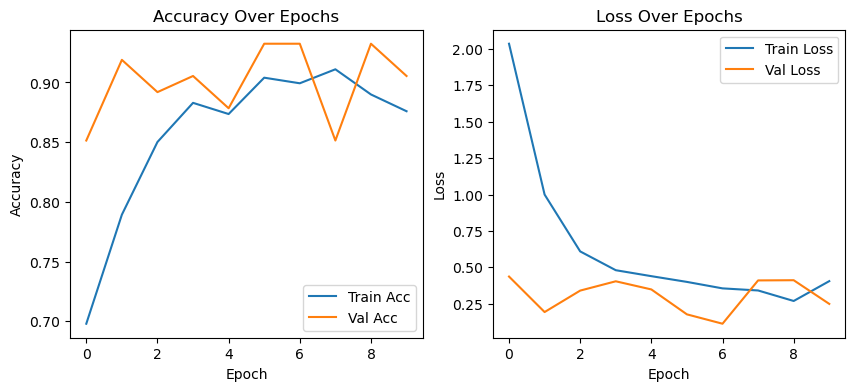

In [9]:
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

In [10]:
model.save("okra_vgg19_classifier.h5")

In [11]:
from tensorflow.keras.preprocessing import image

test_image_path = "Okra_Dataset\over_matured_Okra\FLIR7294.jpg"  # <-- UPDATE with your test image
img = image.load_img(test_image_path, target_size=IMG_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)
class_names = list(train_gen.class_indices.keys())
print("Prediction:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
Prediction: over_matured_Okra


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


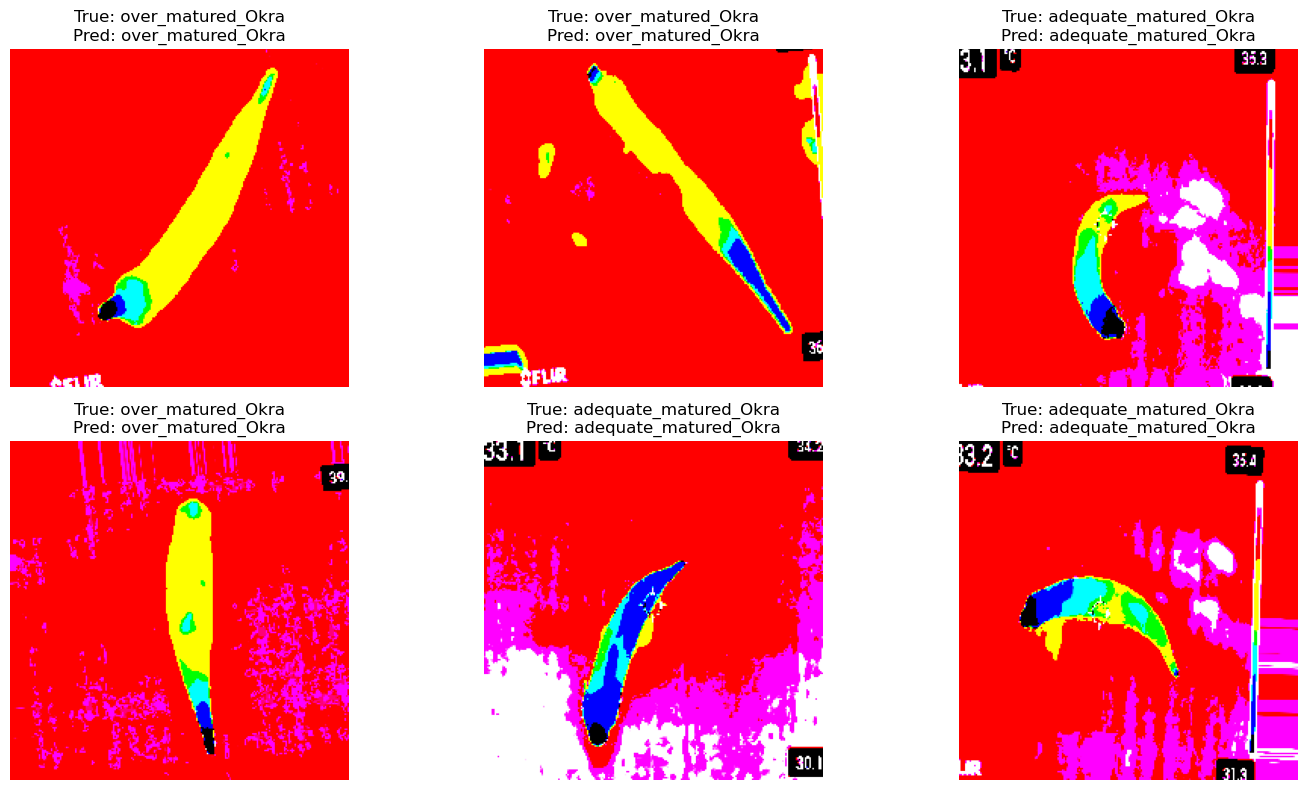

In [12]:
import random

val_images, val_labels = next(val_gen)
class_names = list(train_gen.class_indices.keys())

num_display = 6  
indices = random.sample(range(len(val_images)), num_display)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    img = val_images[idx]
    # Predict
    pred = model.predict(img[np.newaxis, ...])
    pred_label = class_names[np.argmax(pred)]
    true_label = class_names[np.argmax(val_labels[idx])]
    
    plt.subplot(2, 3, i+1)

    img_disp = img.copy()
    img_disp += [103.939/255., 116.779/255., 123.68/255.]  # Undo mean subtraction (divide by 255.0 if inputs are in [0,1])
    img_disp = img_disp[..., ::-1]  # BGR to RGB
    img_disp = np.clip(img_disp, 0, 1)
    plt.imshow(img_disp)
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


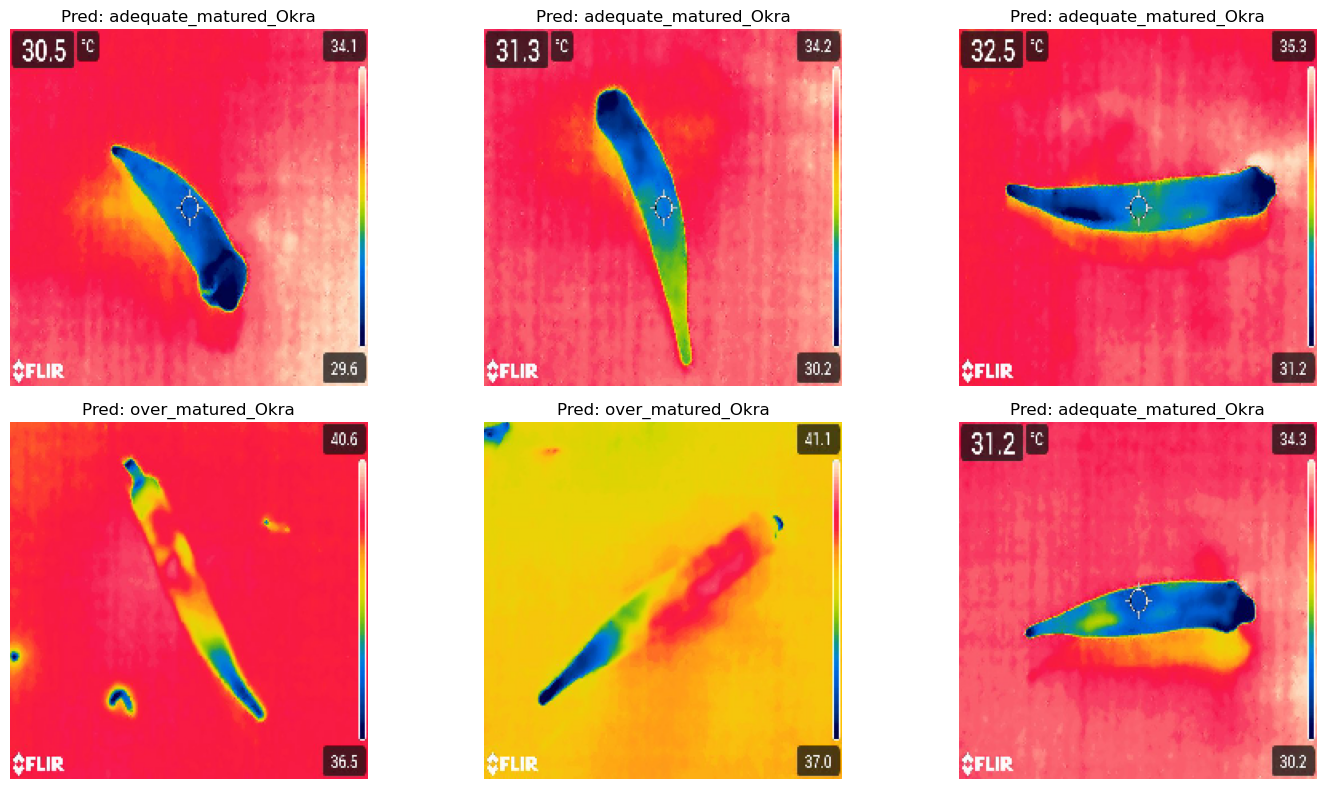

In [13]:
from tensorflow.keras.preprocessing import image
import random

# List of validation image file paths
val_filepaths = []
for cls in val_gen.class_indices.keys():
    folder = os.path.join(data_dir, cls)
    images_list = [os.path.join(folder, img) for img in os.listdir(folder)]
    val_filepaths.extend(images_list)

# Pick a few random images to display
random_imgs = random.sample(val_filepaths, 6)

plt.figure(figsize=(15, 8))

for i, img_path in enumerate(random_imgs):
    # ------------ Load original image for display ------------
    img_display = image.load_img(img_path, target_size=IMG_SIZE)
    img_array_disp = image.img_to_array(img_display) / 255.0  # scale for display
    
    # ------------ Make a copy for prediction and preprocess ------------
    img_array_pred = np.expand_dims(img_array_disp.copy(), axis=0)
    img_array_pred = preprocess_input(img_array_pred * 255.0)  # preprocess_input expects 0–255 range

    pred = model.predict(img_array_pred)
    pred_label = class_names[np.argmax(pred)]

    plt.subplot(2, 3, i+1)
    plt.imshow(img_array_disp)  # original image
    plt.title(f"Pred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step


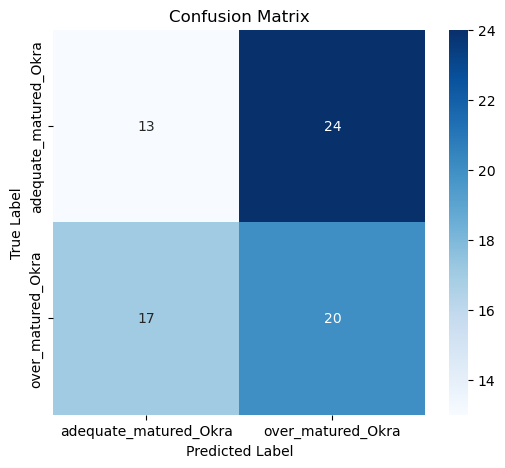

                       precision    recall  f1-score   support

adequate_matured_Okra       0.43      0.35      0.39        37
    over_matured_Okra       0.45      0.54      0.49        37

             accuracy                           0.45        74
            macro avg       0.44      0.45      0.44        74
         weighted avg       0.44      0.45      0.44        74



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get all validation data labels and predictions
val_gen.reset()
Y_pred = model.predict(val_gen, steps=val_gen.samples // val_gen.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes
class_names = list(val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (optional, gives precision/recall/F1 per class)
print(classification_report(y_true, y_pred, target_names=class_names))


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_102']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26664\3775044489.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet')


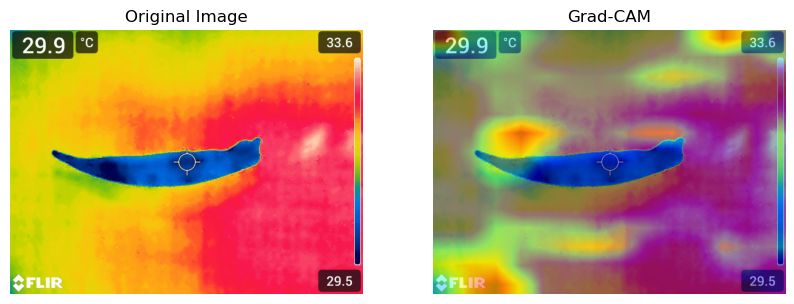

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted: [('n07248320', 'book_jacket', np.float32(0.31316686))]


In [31]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# --- Load model ---
model = VGG16(weights='imagenet')
last_conv_layer_name = "block5_conv3"  # corrected layer
last_conv_layer = model.get_layer(last_conv_layer_name)

# --- Load and preprocess image ---
img_path = r"C:\Users\DELL\okra\okra\Okra_Dataset\adequate_matured_Okra\FLIR9169.jpg"  # change to your image path
img = Image.open(img_path).convert('RGB')
img_resized = img.resize((224, 224))
img_array = np.array(img_resized)
img_tensor = np.expand_dims(img_array, axis=0)
img_tensor = preprocess_input(img_tensor)

# --- Build model for Grad-CAM ---
grad_model = tf.keras.models.Model(
    inputs=[model.inputs],
    outputs=[last_conv_layer.output, model.output]
)

# --- Compute gradient of top predicted class w.r.t conv layer ---
with tf.GradientTape() as tape:
    conv_outputs, preds = grad_model(img_tensor)
    pred_index = tf.argmax(preds[0])
    score = preds[0, pred_index]

tape.watch(conv_outputs)
grads = tape.gradient(score, conv_outputs)

# --- Pool gradients over spatial dimensions ---
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# --- Weight conv outputs by pooled gradients ---
conv_outputs = conv_outputs[0]  # remove batch dimension
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0)
heatmap /= tf.math.reduce_max(heatmap)  # normalize 0-1

# --- Resize heatmap to original image size using PIL ---
heatmap_img = Image.fromarray(np.uint8(heatmap.numpy() * 255))
heatmap_img = heatmap_img.resize(img.size, resample=Image.BILINEAR)
heatmap_array = np.array(heatmap_img)

# --- Create RGB heatmap (Jet colormap) ---
import matplotlib.cm as cm
colormap = cm.get_cmap('jet')
heatmap_rgb = colormap(heatmap_array / 255.0)[:, :, :3]  # drop alpha
heatmap_rgb = (heatmap_rgb * 255).astype(np.uint8)

# --- Superimpose heatmap on original image ---
superimposed = np.array(img) * 0.6 + heatmap_rgb * 0.4
superimposed = np.uint8(superimposed)

# --- Display ---
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed)
plt.title("Grad-CAM")
plt.axis('off')
plt.show()

# --- Print top prediction ---
decoded = decode_predictions(preds.numpy(), top=1)[0]
print("Predicted:", decoded)



In [32]:
def grad_cam_for_image(model, img_path, layer_name="block5_conv3"):
    from PIL import Image
    import numpy as np
    import matplotlib.cm as cm
    from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
    import tensorflow as tf
    
    # Load model layer
    last_conv_layer = model.get_layer(layer_name)
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[last_conv_layer.output, model.output]
    )
    
    # Load image
    img = Image.open(img_path).convert('RGB')
    img_resized = img.resize((224, 224))
    img_array = np.array(img_resized)
    img_tensor = np.expand_dims(img_array, axis=0)
    img_tensor = preprocess_input(img_tensor)
    
    # Grad-CAM
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_tensor)
        pred_index = tf.argmax(preds[0])
        score = preds[0, pred_index]
    tape.watch(conv_outputs)
    grads = tape.gradient(score, conv_outputs)
    
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)
    
    heatmap_img = Image.fromarray(np.uint8(heatmap.numpy() * 255))
    heatmap_img = heatmap_img.resize(img.size, resample=Image.BILINEAR)
    heatmap_array = np.array(heatmap_img)
    
    colormap = cm.get_cmap('jet')
    heatmap_rgb = colormap(heatmap_array / 255.0)[:, :, :3]
    heatmap_rgb = (heatmap_rgb * 255).astype(np.uint8)
    
    superimposed = np.array(img) * 0.6 + heatmap_rgb * 0.4
    superimposed = np.uint8(superimposed)
    
    decoded_class = decode_predictions(preds.numpy(), top=1)[0]
    return superimposed, heatmap, decoded_class


C:\Users\DELL\AppData\Local\Temp\ipykernel_26664\2114882565.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet')


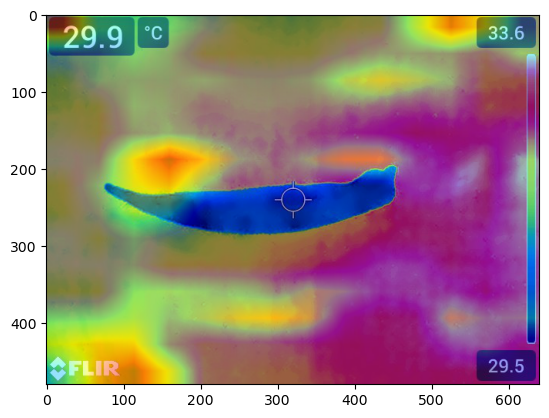

[('n07248320', 'book_jacket', np.float32(0.31316686))]


In [33]:
overlay, heatmap, prediction = grad_cam_for_image(model, r"C:\Users\DELL\okra\okra\Okra_Dataset\adequate_matured_Okra\FLIR9169.jpg")
plt.imshow(overlay)
plt.show()
print(prediction)


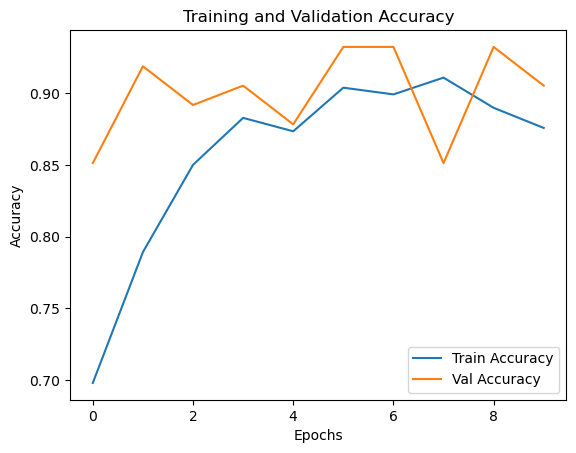

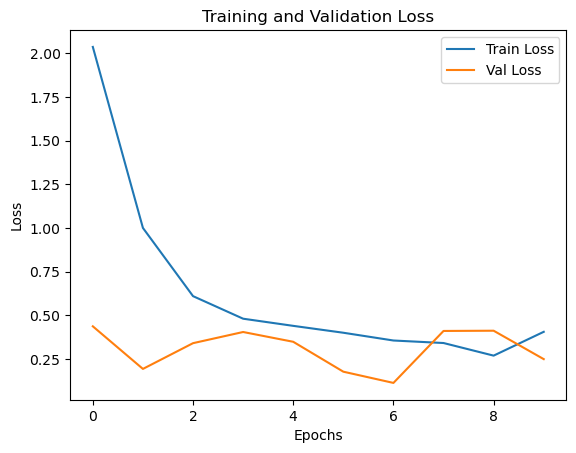

In [34]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_curve.png')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()


In [37]:
# full_gradcam_results.py
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

# --- Load model ---
model = VGG19(weights='imagenet')
last_conv_layer_name = "block5_conv4"  # VGG19 last conv layer in block5
last_conv_layer = model.get_layer(last_conv_layer_name)

grad_model = tf.keras.models.Model(
    inputs=[model.inputs],
    outputs=[last_conv_layer.output, model.output]
)

# --- Grad-CAM function ---
def grad_cam(img_path):
    img = Image.open(img_path).convert('RGB').resize((224,224))
    img_array = np.expand_dims(np.array(img), axis=0)
    img_array = preprocess_input(img_array)

    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        score = preds[0, pred_index]
    tape.watch(conv_outputs)
    grads = tape.gradient(score, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)

    # Resize heatmap
    heatmap_img = Image.fromarray(np.uint8(heatmap.numpy()*255)).resize(img.size)
    
    # Apply Jet colormap
    colormap = cm.get_cmap('jet')
    heatmap_rgb = colormap(np.array(heatmap_img)/255.0)[:,:,:3]
    heatmap_rgb = (heatmap_rgb*255).astype(np.uint8)

    # Superimpose heatmap
    superimposed = np.array(img)*0.6 + heatmap_rgb*0.4
    superimposed = np.uint8(superimposed)

    decoded_class = decode_predictions(preds.numpy(), top=1)[0]

    return superimposed, decoded_class

# --- Directories ---
input_dir = r'Okra_Dataset'  # Replace with your dataset path
output_dir = r'gradcam_results'
os.makedirs(output_dir, exist_ok=True)

# --- Process all images and save results ---
results = []

for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(root, file)
            
            # Generate Grad-CAM
            superimposed_img, prediction = grad_cam(img_path)
            
            # Save Grad-CAM image
            save_path = os.path.join(output_dir, 'gradcam_' + file)
            Image.fromarray(superimposed_img).save(save_path)
            
            # Append to results table
            results.append([file, prediction[0][1], save_path])

# --- Save results table as CSV ---
df = pd.DataFrame(results, columns=['Image', 'Predicted Class', 'Grad-CAM Image'])
df.to_csv(os.path.join(output_dir, 'results.csv'), index=False)

print("Grad-CAM generation complete! Results saved in:", output_dir)


574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 239s 0us/step


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_125']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26664\4137879928.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet')


Grad-CAM generation complete! Results saved in: gradcam_results


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_283']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26664\1702435885.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet')


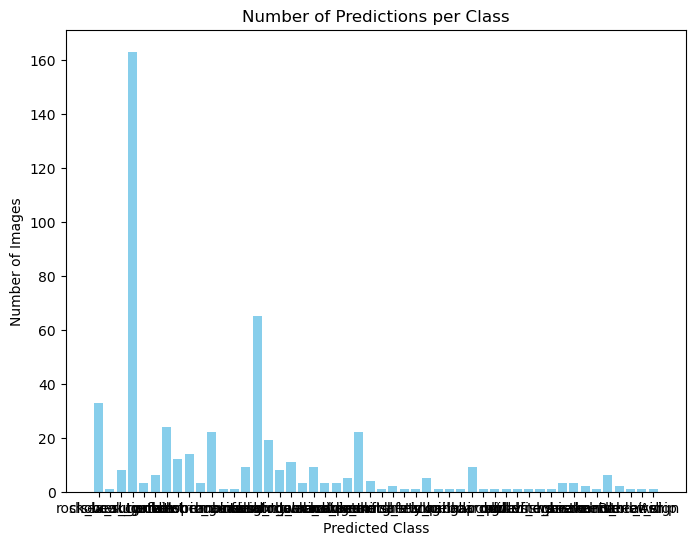

FileNotFoundError: [Errno 2] No such file or directory: 'Okra_Dataset\\FLIR7264.jpg'

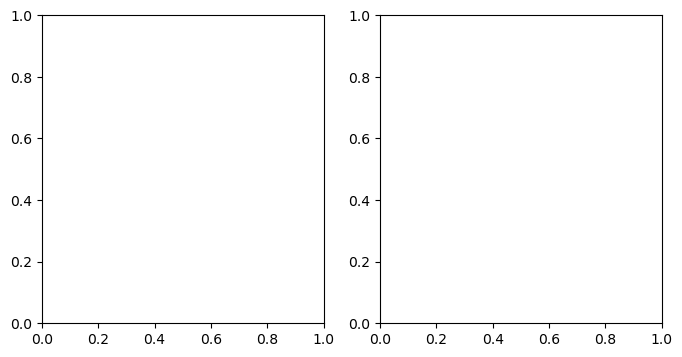

In [45]:
# gradcam_report.py
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

# --- Load VGG19 ---
model = VGG19(weights='imagenet')
last_conv_layer_name = "block5_conv4"  # last conv layer in VGG19
last_conv_layer = model.get_layer(last_conv_layer_name)

grad_model = tf.keras.models.Model(
    inputs=[model.inputs],
    outputs=[last_conv_layer.output, model.output]
)

# --- Grad-CAM function ---
def grad_cam(img_path):
    img = Image.open(img_path).convert('RGB').resize((224,224))
    img_array = np.expand_dims(np.array(img), axis=0)
    img_array = preprocess_input(img_array)

    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        score = preds[0, pred_index]
    tape.watch(conv_outputs)
    grads = tape.gradient(score, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)

    # Resize heatmap
    heatmap_img = Image.fromarray(np.uint8(heatmap.numpy()*255)).resize(img.size)
    
    # Apply Jet colormap
    colormap = cm.get_cmap('jet')
    heatmap_rgb = colormap(np.array(heatmap_img)/255.0)[:,:,:3]
    heatmap_rgb = (heatmap_rgb*255).astype(np.uint8)

    # Superimpose heatmap
    superimposed = np.array(img)*0.6 + heatmap_rgb*0.4
    superimposed = np.uint8(superimposed)

    decoded_class = decode_predictions(preds.numpy(), top=1)[0]

    return superimposed, decoded_class

# --- Directories ---
input_dir = r'Okra_Dataset'  # change to your dataset path
output_dir = r'gradcam_report'
os.makedirs(output_dir, exist_ok=True)

# --- Process all images ---
results = []
class_counts = {}

for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(root, file)
            
            # Grad-CAM
            superimposed_img, prediction = grad_cam(img_path)
            
            # Save Grad-CAM image
            save_path = os.path.join(output_dir, 'gradcam_' + file)
            Image.fromarray(superimposed_img).save(save_path)
            
            pred_class_name = prediction[0][1]
            results.append([file, pred_class_name, save_path])
            
            # Count predictions per class
            if pred_class_name not in class_counts:
                class_counts[pred_class_name] = 0
            class_counts[pred_class_name] += 1

# --- Save results table ---
df = pd.DataFrame(results, columns=['Image', 'Predicted Class', 'Grad-CAM Image'])
df.to_csv(os.path.join(output_dir, 'gradcam_results.csv'), index=False)

# --- Plot predictions per class ---
plt.figure(figsize=(8,6))
classes = list(class_counts.keys())
counts = list(class_counts.values())
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Predicted Class')
plt.ylabel('Number of Images')
plt.title('Number of Predictions per Class')
plt.savefig(os.path.join(output_dir, 'predictions_per_class.png'))
plt.show()

# --- Create report-style figures ---
fig_dir = os.path.join(output_dir, 'figures')
os.makedirs(fig_dir, exist_ok=True)

for idx, row in df.iterrows():
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    
    # Original image
    #img_orig = Image.open(os.path.join(input_dir, row['Image']))
    # Instead of row['Image'], store full path
    img_orig = Image.open(os.path.join(input_dir, row['Grad-CAM Image'].split('gradcam_')[-1]))

    ax[0].imshow(img_orig)
    ax[0].axis('off')
    ax[0].set_title('Original Image')
    
    # Grad-CAM image
    img_gradcam = Image.open(row['Grad-CAM Image'])
    ax[1].imshow(img_gradcam)
    ax[1].axis('off')
    ax[1].set_title(f"Grad-CAM\nPredicted: {row['Predicted Class']}")
    
    plt.tight_layout()
    fig_path = os.path.join(fig_dir, f"figure_{idx+1}.png")
    plt.savefig(fig_path)
    plt.close()

print("All Grad-CAM images, tables, graphs, and figures are saved in:", output_dir)


In [46]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ==========================================================
# 1️⃣ Load Grad-CAM Predictions (from your previous results)
# ==========================================================
# If you saved predictions in a CSV (from your Grad-CAM step)
# The CSV should have columns: "Image", "True Label", "Predicted Class"
results_csv = r"C:\Users\DELL\okra\okra\gradcam_results\gradcam_results.csv"   # 👈 update path if needed
df = pd.read_csv(results_csv)

true_labels = df["True Label"].tolist()
pred_labels = df["Predicted Class"].tolist()

# ==========================================================
# 2️⃣ Accuracy & Basic Metrics
# ==========================================================
accuracy = accuracy_score(true_labels, pred_labels)
print(f"✅ Grad-CAM Model Accuracy: {accuracy * 100:.2f}%\n")

report = classification_report(true_labels, pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("gradcam_analysis_results/gradcam_classification_report.csv", index=True)

print("📊 Classification Report:")
print(report_df)

# ==========================================================
# 3️⃣ Confusion Matrix
# ==========================================================
unique_classes = sorted(list(set(true_labels + pred_labels)))
cm = confusion_matrix(true_labels, pred_labels, labels=unique_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.title("Grad-CAM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("gradcam_analysis_results/gradcam_confusion_matrix.png")
plt.show()

# ==========================================================
# 4️⃣ Class Distribution Graph
# ==========================================================
plt.figure(figsize=(8,5))
sns.countplot(x=pred_labels, order=unique_classes, palette="coolwarm")
plt.title("Predicted Class Distribution (Grad-CAM Model)")
plt.xticks(rotation=45)
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("gradcam_analysis_results/gradcam_class_distribution.png")
plt.show()

# ==========================================================
# 5️⃣ Precision, Recall, F1 Graphs
# ==========================================================
# Extract per-class metrics from classification report
metrics = report_df.iloc[:-3][['precision', 'recall', 'f1-score']]
metrics.plot(kind='bar', figsize=(8,5))
plt.title("Grad-CAM Model Performance per Class")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.tight_layout()
plt.savefig("gradcam_analysis_results/gradcam_metrics_per_class.png")
plt.show()

print("\n✅ All Grad-CAM result graphs and confusion matrix saved inside 'gradcam_analysis_results/' folder.")


KeyError: 'True Label'

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Path to your dataset folder (structured as one folder per class)
train_dir = r"C:\Users\DELL\okra\okra\Okra_Dataset"

# 1️⃣ Create data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# 2️⃣ Load VGG19 base model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# 3️⃣ Add new classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 4️⃣ Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Save model
model.save("okra_vgg19_gradcam.h5")



Found 402 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 164s 6s/step - accuracy: 0.7239 - loss: 0.6288 - val_accuracy: 0.7879 - val_loss: 0.3801
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.9055 - loss: 0.2363 - val_accuracy: 0.9192 - val_loss: 0.2254
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.9577 - loss: 0.1325 - val_accuracy: 0.8384 - val_loss: 0.3328
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9701 - loss: 0.0964 - val_accuracy: 0.9293 - val_loss: 0.2258
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.9900 - loss: 0.0680 - val_accuracy: 0.8485 - val_loss: 0.3045
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.8586 - val_loss: 0.2951
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.9925 - loss: 0.0444 - val_accuracy: 0.8990 - val_loss: 0.2566
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.9826 - loss: 0.0621 - val_accuracy: 0.9394 - val_los

In [ ]:
# full_gradcam_results.py
import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Configuration ---
input_dir = r'Okra_Dataset'  # Your dataset path
output_dir = r'gradcam_results'
model_path = 'okra_maturity_model.h5'  # You'll need to train this first
os.makedirs(output_dir, exist_ok=True)

# --- Custom model for your 2-class problem ---
def create_okra_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base model
    
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(2, activation='softmax')(x)  # 2 classes
    
    model = Model(inputs, outputs)
    return model

# --- Train the model (run this once to create your model) ---
def train_model():
    # Create and compile model
    model = create_okra_model()
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    # Data generators
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )
    
    train_generator = datagen.flow_from_directory(
        input_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )
    
    validation_generator = datagen.flow_from_directory(
        input_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )
    
    # Train model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )
    
    # Save model
    model.save(model_path)
    print("Model trained and saved!")
    
    return model, train_generator.class_indices

# --- Load your custom model ---
def load_custom_model():
    if os.path.exists(model_path):
        model = tf.keras.models.load_model(model_path)
        
        # Get class names from directory structure
        class_names = sorted(os.listdir(input_dir))
        class_indices = {class_name: i for i, class_name in enumerate(class_names)}
        
        return model, class_indices
    else:
        print("Trained model not found. Please train the model first.")
        return None, None

# --- Grad-CAM function for custom model ---
def grad_cam_custom(img_path, model, class_indices, last_conv_layer_name="block5_conv4"):
    # Get the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    
    # Create grad model
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[last_conv_layer.output, model.output]
    )
    
    # Load and preprocess image
    img = Image.open(img_path).convert('RGB').resize((224, 224))
    img_array = np.expand_dims(np.array(img), axis=0)
    img_array = img_array / 255.0  # Normalize for custom model
    
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        score = preds[0, pred_index]
    
    grads = tape.gradient(score, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap)

    # Resize heatmap
    heatmap_img = Image.fromarray(np.uint8(heatmap.numpy()*255)).resize(img.size)
    
    # Apply Jet colormap
    colormap = cm.get_cmap('jet')
    heatmap_rgb = colormap(np.array(heatmap_img)/255.0)[:,:,:3]
    heatmap_rgb = (heatmap_rgb*255).astype(np.uint8)

    # Superimpose heatmap
    superimposed = np.array(img)*0.6 + heatmap_rgb*0.4
    superimposed = np.uint8(superimposed)

    # Get prediction
    class_names = list(class_indices.keys())
    predicted_class = class_names[pred_index.numpy()]
    confidence = preds[0][pred_index.numpy()]

    return superimposed, predicted_class, confidence

# --- Main execution ---
if __name__ == "__main__":
    # Check if model exists, if not train it
    model, class_indices = load_custom_model()
    
    if model is None:
        print("Training model first...")
        model, class_indices = train_model()
    
    print("Class mapping:", class_indices)
    
    # Process all images
    results = []
    
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(root, file)
                
                # Generate Grad-CAM
                try:
                    superimposed_img, predicted_class, confidence = grad_cam_custom(
                        img_path, model, class_indices
                    )
                    
                    # Save Grad-CAM image
                    save_path = os.path.join(output_dir, 'gradcam_' + file)
                    Image.fromarray(superimposed_img).save(save_path)
                    
                    # Append to results table
                    results.append([file, predicted_class, f"{confidence:.4f}", save_path])
                    print(f"Processed: {file} -> {predicted_class} ({confidence:.4f})")
                    
                except Exception as e:
                    print(f"Error processing {file}: {str(e)}")
                    continue
    
    # Save results table as CSV
    df = pd.DataFrame(results, columns=['Image', 'Predicted Class', 'Confidence', 'Grad-CAM Image'])
    df.to_csv(os.path.join(output_dir, 'results.csv'), index=False)
    
    print("Grad-CAM generation complete! Results saved in:", output_dir)
    print(f"Processed {len(results)} images successfully.")

Trained model not found. Please train the model first.
Training model first...
Found 402 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 9/13 ━━━━━━━━━━━━━━━━━━━━ 33s 8s/step - accuracy: 0.4860 - loss: 0.8744  